<a href="https://colab.research.google.com/github/ulumbagas/Machine_learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from numpy import random
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

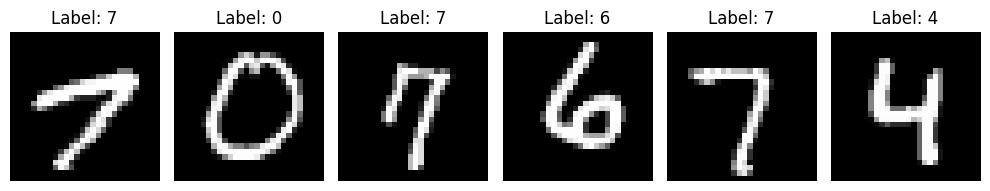

In [9]:
plt.figure(figsize=(10, 5))
for i in range(6):
    idx=random.randint(2190)
    plt.subplot(1, 6, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
# Flatten all dataset X_train
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

# Check result
print(X_train_flattened.shape)


(60000, 784)


In [22]:
#Scaling
X_train_flattened=X_train_flattened/255

In [23]:
# Flatten all dataset X_test
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Check result
print(X_test_flattened.shape)


(10000, 784)


In [24]:
#Scaling
X_test_flattened=X_test_flattened/255

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(n_estimators = 500)
model.fit(X_train_flattened, y_train)

RandomForestClassifier(n_estimators=500)

In [27]:
y_pred = model.predict(X_test_flattened)


In [28]:
# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL: 0.9717


In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.9714862365872661

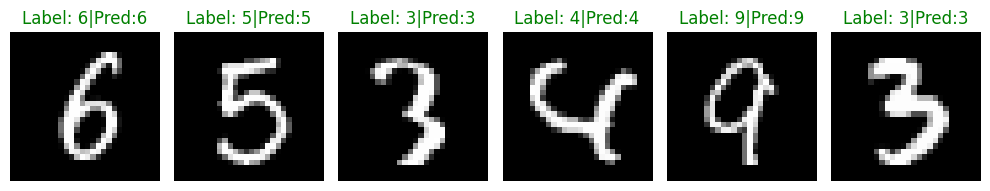

In [33]:
#check result prediction and test
plt.figure(figsize=(10, 5))
for i in range(6):
    idx=random.randint(2190)
    font={"color":"g"} if y_pred[idx]==y_test[idx] else {"color":"r"}
    plt.subplot(1, 6, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Label: {y_test[idx]}|Pred:{y_pred[idx]}",fontdict=font)
    plt.axis('off')
plt.tight_layout()
plt.show()